# Generate report  - POC

## Read data

In [2]:
from readdata import read_concat_data

xls_data = './data/sample_data.xlsx'
data = read_concat_data(xls_data)

In [3]:
data

OD_delta  OD_450  OD_630
A 0     1.554  1.5961  0.0421
  1     0.921  0.9607  0.0397
  2    0.5703  0.6079  0.0376
  3    0.3327  0.3696  0.0369
  4    1.4609  1.4994  0.0385
...       ...     ...     ...
H 7    0.4213  0.4591  0.0378
  8    0.6562  0.6945  0.0383
  9    0.3631  0.4009  0.0378
  10   0.2077  0.2456  0.0379
  11   0.1284  0.1651  0.0367

[96 rows x 3 columns]

## Layouts

In [6]:
import data.layouts as layouts
from readdata import to_plate_layout

to_plate_layout(layouts.l_plate_layout)

,1,2,3,4,5,6,7,8,9,10,11,12
A,k_1,k_2,k_3,k_4,r1_1,r2_1,r3_1,r4_1,r5_1,r6_1,r7_1,b
B,s1_1,s1_2,s1_3,s1_4,s8_1,s8_2,s8_3,s8_4,s15_1,s15_2,s15_3,s15_4
C,s2_1,s2_2,s2_3,s2_4,s9_1,s9_2,s9_3,s9_4,s16_1,s16_2,s16_3,s16_4
D,s3_1,s3_2,s3_3,s3_4,s10_1,s10_2,s10_3,s10_4,s17_1,s17_2,s17_3,s17_4
E,s4_1,s4_2,s4_3,s4_4,s11_1,s11_2,s11_3,s11_4,s18_1,s18_2,s18_3,s18_4
F,s5_1,s5_2,s5_3,s5_4,s12_1,s12_2,s12_3,s12_4,s19_1,s19_2,s19_3,s19_4
G,s6_1,s6_2,s6_3,s6_4,s13_1,s13_2,s13_3,s13_4,s20_1,s20_2,s20_3,s20_4
H,s7_1,s7_2,s7_3,s7_4,s14_1,s14_2,s14_3,s14_4,s21_1,s21_2,s21_3,s21_4


Convert plate layout list configuration to CSV (tabular data) for later use.

In [8]:
from readdata import save_plate_layout_csv

def save_plate_layout_csv(layout_list, out_file):
  l = to_plate_layout(layout_list)
  l.to_csv(out_file, index=False)

SAVE_LAYOUTS_CSV = False
if SAVE_LAYOUTS_CSV:
  save_plate_layout_csv(layouts.l_plate_layout, './data/plate_layout.csv')
  save_plate_layout_csv(layouts.l_plate_layout_ident, './data/plate_layout_ident.csv')
  save_plate_layout_csv(layouts.l_plate_layout_num, './data/plate_layout_num.csv')
  save_plate_layout_csv(layouts.l_plate_layout_dil, './data/plate_layout_dil.csv')

Check reading plate layout...

In [11]:
from readdata import index_plate_layout
import pandas as pd

def read_plate_layout(file_path):
  plate_layout = pd.read_csv(file_path)
  index_plate_layout(plate_layout)

  return plate_layout

read_plate_layout('./data/plate_layout.csv')


,1,2,3,4,5,6,7,8,9,10,11,12
A,k_1,k_2,k_3,k_4,r1_1,r2_1,r3_1,r4_1,r5_1,r6_1,r7_1,b
B,s1_1,s1_2,s1_3,s1_4,s8_1,s8_2,s8_3,s8_4,s15_1,s15_2,s15_3,s15_4
C,s2_1,s2_2,s2_3,s2_4,s9_1,s9_2,s9_3,s9_4,s16_1,s16_2,s16_3,s16_4
D,s3_1,s3_2,s3_3,s3_4,s10_1,s10_2,s10_3,s10_4,s17_1,s17_2,s17_3,s17_4
E,s4_1,s4_2,s4_3,s4_4,s11_1,s11_2,s11_3,s11_4,s18_1,s18_2,s18_3,s18_4
F,s5_1,s5_2,s5_3,s5_4,s12_1,s12_2,s12_3,s12_4,s19_1,s19_2,s19_3,s19_4
G,s6_1,s6_2,s6_3,s6_4,s13_1,s13_2,s13_3,s13_4,s20_1,s20_2,s20_3,s20_4
H,s7_1,s7_2,s7_3,s7_4,s14_1,s14_2,s14_3,s14_4,s21_1,s21_2,s21_3,s21_4


## Fit

[2.41530440e-02 8.73602923e-01 1.12260107e+14 2.94568562e+03]
[4.87957000e-02 2.11902816e-01 7.85213771e+16 1.79402023e+06]


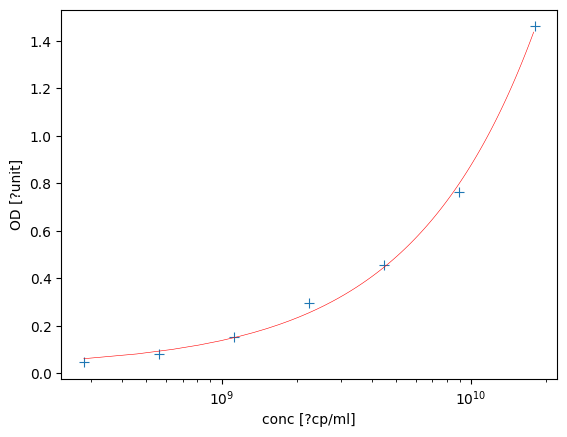

In [13]:
import fitdata

fit_data_path = './data/fit_1.csv'
fitdata.fit_magic(fit_data_path)

## Plate with wells

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')


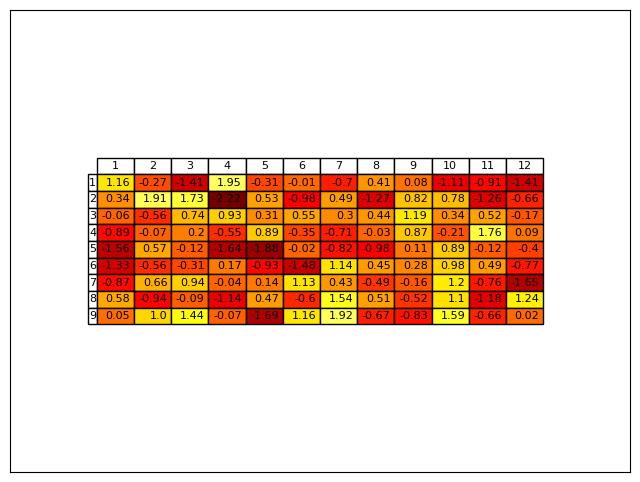

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
randn = np.random.randn
from pandas import *

idx = Index(np.arange(1, 10))
print(idx)
df = DataFrame(randn(9, 12), index=idx, columns=np.arange(1, 13))
vals = np.around(df.values, 2)
norm = plt.Normalize(vals.min()-1, vals.max()+1)
colours = plt.cm.hot(norm(vals))

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, frameon=True, xticks=[], yticks=[])

the_table=plt.table(cellText=vals, rowLabels=df.index, colLabels=df.columns, 
                    colWidths = [0.06]*vals.shape[1], loc='center', 
                    cellColours=colours)
plt.savefig('/content/foo.png')
plt.show()

## Report

### Markdown report
We build a report here...

In [ ]:
md_content = ''''
# Markdown report

This a PoC for automatic report generation...  

!["alt text"](foo.png "Table")
'''

### Export to PDF

In [ ]:
from md2pdf.core import md2pdf
pdf_file_path = "/content/my.pdf"

In [ ]:
md2pdf(pdf_file_path,
       md_content=md_content,
       md_file_path=None,
       css_file_path=None,
       base_url=None)

In [ ]:
md_file_path = "/content/test.md"
md2pdf(pdf_file_path,
       md_content=None,
       md_file_path=md_file_path,
       css_file_path=None,
       base_url=None)